# LINEAR REGRESSION ON DATASET(BOSTONHOUSING)

In [27]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression


In [28]:
df=pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [29]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [33]:
df[['CRIM','AGE','INDUS','LSTAT','CHAS','ZN']]=df[['CRIM','AGE','INDUS','LSTAT','CHAS','ZN']].fillna(df[['CRIM','AGE','INDUS','LSTAT','CHAS','ZN']].mean())

<Axes: >

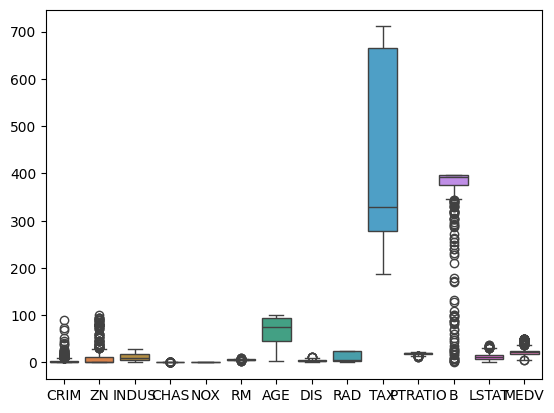

In [34]:
sns.boxplot(data=df)

In [35]:
# identifying and cleaning outliers
# use IQR approach to remove outliers

q1 =df.quantile(0.25)
q3 = df.quantile(0.75)
# Inteqaurtile Range Formula 
iqr = q3 - q1 
# formula of upper and lower outliers 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace moderate values with upper/lower bounds instead of removing rows
df_clean = df.copy()
for i in df.columns:
    df_clean[i] = np.where(df_clean[i] < lower_bound[i] , lower_bound[i] , df_clean[i])
    df_clean[i] = np.where(df_clean[i] > upper_bound[i] , upper_bound[i] , df_clean[i])

<Axes: >

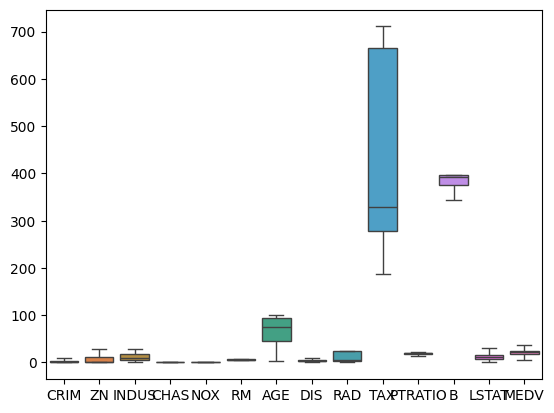

In [36]:
sns.boxplot(data=df_clean)

In [37]:
df_clean.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

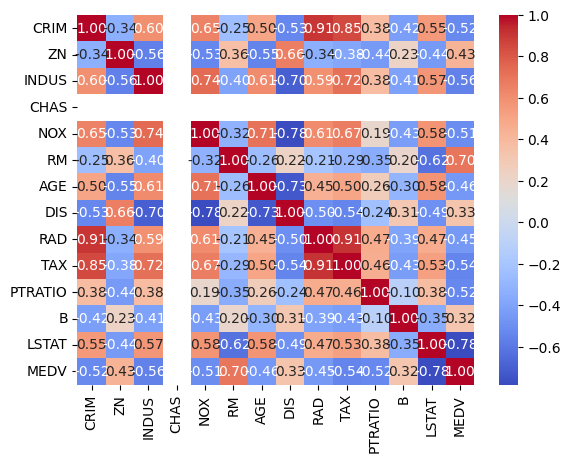

In [38]:
corr_matrix=df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [39]:
# separate features x and y for linea regression
x=df_clean.drop(columns=['CRIM'])
y=df_clean['CRIM']

In [40]:
# preprocessing
scalar=StandardScaler()
df_clean=scalar.fit_transform(df_clean)


In [41]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8)

In [42]:
# build the model
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
model.score(x_train,y_train)

0.8576658398235074

In [44]:
#prediction
model.predict(x_test)

array([ 7.49307523e+00,  1.06522998e+00, -7.54002968e-02,  6.19058634e+00,
        1.89277571e+00,  7.71724905e+00,  7.44232426e-01,  3.68717791e-01,
        7.87747393e+00,  7.39576027e+00,  1.15671446e-03, -2.47552758e-01,
        9.72452022e-01,  2.52889032e-01,  1.46096124e+00, -4.02561915e-01,
        1.17122826e+00,  7.29561677e+00,  4.18044076e-01,  2.90912143e+00,
        2.60824900e+00,  5.24386687e-01, -2.30219487e-01, -5.15960102e-02,
        5.28911003e+00,  4.82040654e+00,  1.46851886e+00,  8.76541412e-01,
       -4.24422362e-01,  9.88134872e-01,  6.01258678e-01,  4.52591694e-01,
        9.20642093e-01,  1.51446127e+00,  6.56303800e-01, -4.05317449e-02,
        1.69437618e+00,  1.08730060e-01,  1.86048762e+00,  3.17227736e-01,
        8.06599402e-01, -2.51959908e-01,  6.26722528e-01,  9.99841674e-01,
        1.96302675e-01,  3.36504037e-01,  1.44978448e+00,  8.74856601e-01,
       -8.05013624e-01,  1.80371205e+00,  8.27829175e-01,  3.04046056e-01,
        9.27561119e-01,  

In [45]:
y_pred=model.predict(x_test)

In [46]:
#model intercept andd slop equations
# print(model.intercept_)
# print(model.coef_)
# print('y=',model.intercept_,'+',model.coef_,'*x')

In [47]:
#evaluation 
from sklearn.metrics import mean_squared_error, r2_score
print("MSE: ", mean_squared_error(y_test , y_pred))
print("RS: ", r2_score(y_test , y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test , y_pred)))

MSE:  1.0831134261177853
RS:  0.8776557757090833
RMSE:  1.0407273543622197


In [48]:
# save the model
# import pickle
# pickle.dump(model, open('model_pk1','wb'))

In [49]:
#load the model
# import pickle
# model_load=pickle.load(open('model_pk1','rb'))